In [ ]:
cd ../ros_metrics

In [4]:
import string
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import readability as rd
from bs4 import BeautifulSoup
from metric_db import MetricDB
from collections import Counter
import wordcloud

In [15]:
cd /home/kscottz/Code/ros_metrics/ros_metrics/

/home/kscottz/Code/ros_metrics/ros_metrics


In [6]:
db = MetricDB('answers')

FileNotFoundError: [Errno 2] No such file or directory: '/home/sumedh/Desktop/ros2-packages-data/data/answers.db.yaml'

In [119]:
answered = []
unanswered = [] 

for answer in db.query('SELECT title, accepted_answer_id FROM questions'):
    if answer["accepted_answer_id"] is not None:
        answered.append(len(answer["title"].split(" ")))
    else:
        unanswered.append(len(answer["title"].split(" ")))

In [120]:
a  = [1,2,3]
b = [4,5,6]
c = a+b
print(c)

[1, 2, 3, 4, 5, 6]


1791
5656
8.019068081106486


(0.0, 1400.0)

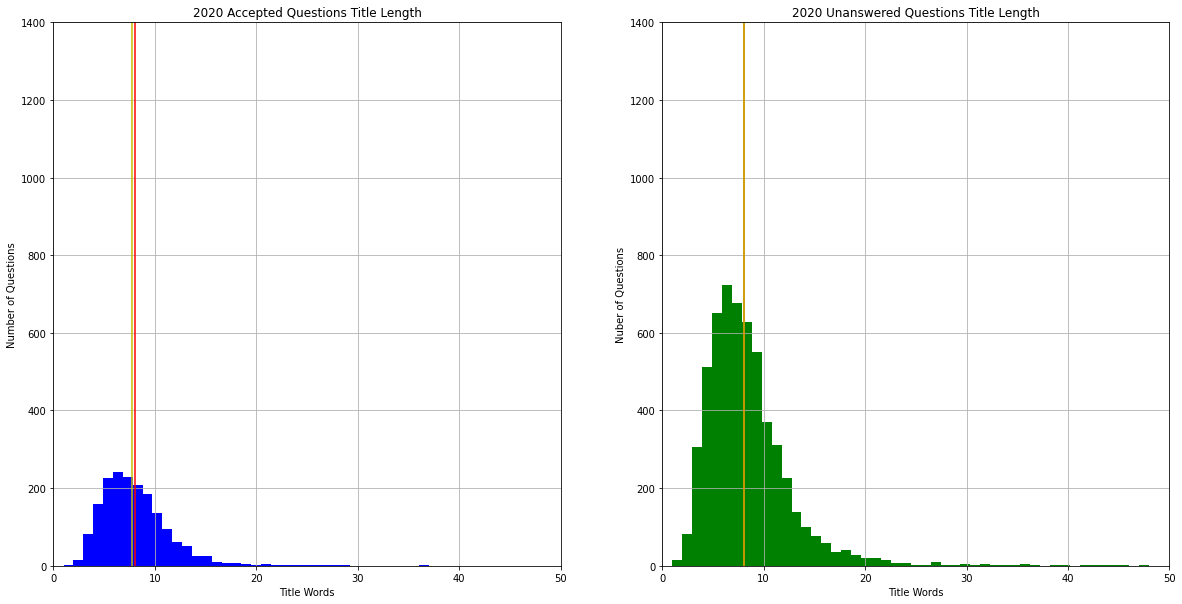

In [123]:
print(len(answered))
print(len(unanswered))
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(20) 
fig.set_figheight(10) 
answered = np.array(answered)
unanswered = np.array(unanswered)
all_data = np.append(answered,unanswered)
median = np.mean(all_data)
print(median)


axs[0].hist(answered, np.max(answered),color="blue")
axs[0].axvline(x= median, color = 'r', label = 'set median') 
axs[0].axvline(x=np.mean(answered), color = 'y', label = 'median') 
axs[0].set_title("2020 Accepted Questions Title Length")
axs[0].grid()
axs[0].set_xlim(0,50)
axs[0].set_ylim(0,1400)
axs[0].set_xlabel("Title Words")
axs[0].set_ylabel("Number of Questions")

axs[1].hist(unanswered,np.max(unanswered),color="green")
axs[1].axvline(x=median, color = 'r', label = 'set median') 
axs[1].axvline(x=np.mean(unanswered), color = 'y', label = 'median') 

axs[1].set_title("2020 Unanswered Questions Title Length")
axs[1].set_xlabel("Title Words")
axs[1].set_ylabel("Nuber of Questions")
axs[1].grid()
axs[1].set_xlim(0,50)
axs[1].set_ylim(0,1400)


In [142]:
answered = []
unanswered = [] 

for answer in db.query('SELECT summary, accepted_answer_id FROM questions'):
    if answer["accepted_answer_id"] is not None:
        sz = len(answer["summary"].split(" "))
        if sz > 1000:
            sz = 1000
        answered.append(sz)
    else:
        sz = len(answer["summary"].split(" "))
        if sz > 1000:
            sz = 1000
        unanswered.append(sz)

1791
5656


Text(0, 0.5, 'Nuber of Questions')

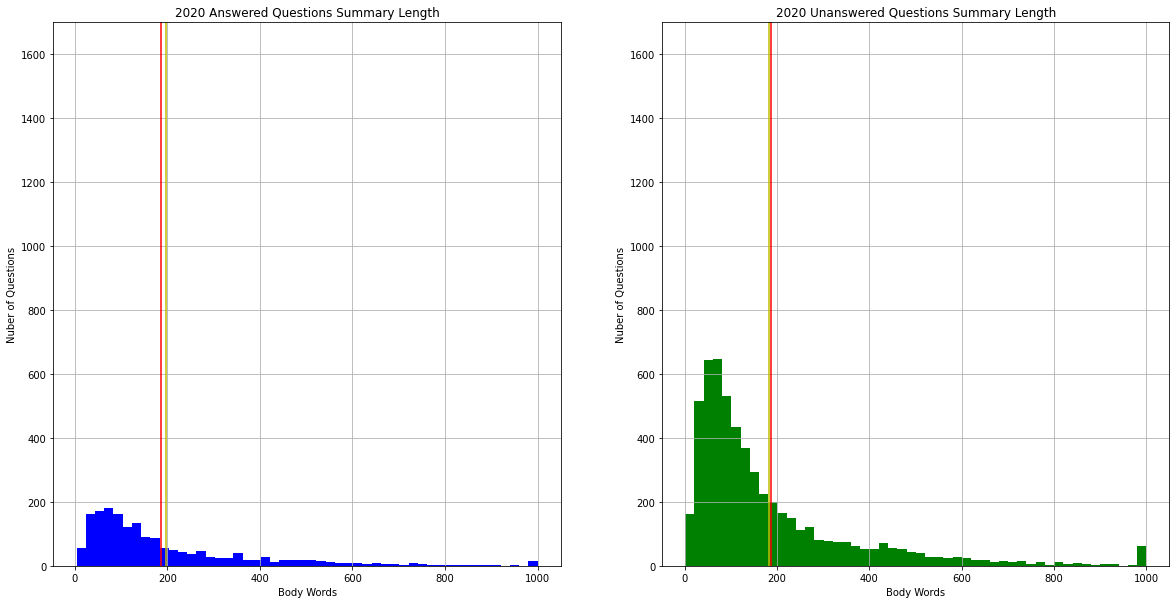

In [143]:
print(len(answered))
print(len(unanswered))
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(20) 
fig.set_figheight(10) 
#fig.title("Question Title Length Distribution")
bins = 50
ylim = 1700

answered = np.array(answered)
unanswered = np.array(unanswered)
all_data = np.append(answered,unanswered)
set_mean = np.mean(all_data)

axs[0].hist(answered, bins, color="blue")# np.max(answered))
axs[0].set_title("2020 Answered Questions Summary Length")
axs[0].grid()
axs[0].axvline(x=set_mean, color = 'r', label = 'set mean') 
axs[0].axvline(x=np.mean(answered), color = 'y', label = 'set mean') 

axs[0].set_ylim(0,ylim)
axs[0].set_xlabel("Body Words")
axs[0].set_ylabel("Nuber of Questions")

axs[1].hist(unanswered, bins, color="green")#np.max(answered))
axs[1].axvline(x=set_mean, color = 'r', label = 'set mean') 
axs[1].axvline(x=np.mean(unanswered), color = 'y', label = 'set mean') 

axs[1].set_title("2020 Unanswered Questions Summary Length")
axs[1].grid()
axs[1].set_ylim(0,ylim)
axs[1].set_xlabel("Body Words")
axs[1].set_ylabel("Nuber of Questions")



In [144]:
score_answered = []
score_unanswered = [] 

def sanitize(html):
    temp = BeautifulSoup(html)
    for t in temp.find_all("code"):
        t.decompose()
    for t in temp.find_all("pre"):
        t.decompose()
    return temp.get_text()
        

for answer in db.query('SELECT summary, accepted_answer_id FROM questions'):
    try:
        if answer["accepted_answer_id"] is not None:
            data = rd.getmeasures(sanitize(answer["summary"]))
            score_answered.append(data)
        else:
            data = rd.getmeasures(sanitize(answer["summary"]))
            score_unanswered.append(data)
    except:
        continue

In [145]:
answered_score = [s["readability grades"]["SMOGIndex"] for s in score_answered]
unanswered_score = [s["readability grades"]["SMOGIndex"] for s in score_unanswered]
metric_name = "Smog Index (lower is easier to read)"

Text(0, 0.5, 'Percent of Questions')

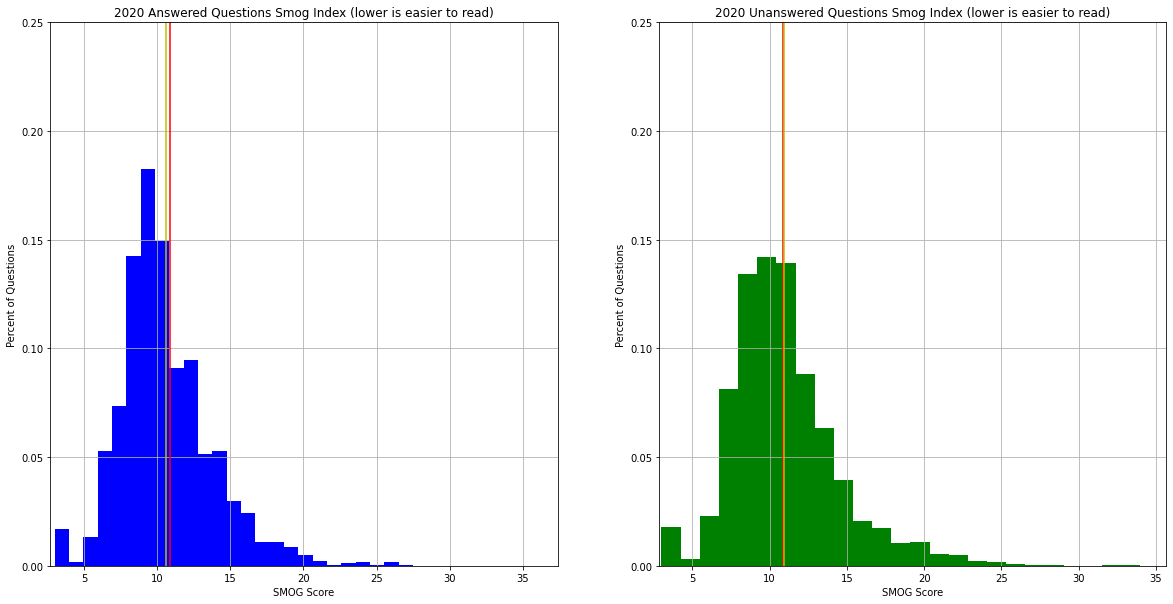

In [149]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(20) 
fig.set_figheight(10) 
#fig.title("Question Title Length Distribution")
bins = 25
answered_score = np.array(answered_score)
unanswered_score = np.array(unanswered_score)
set_mean = np.mean(np.append(answered_score,unanswered_score))

low = np.min([np.min(answered_score),np.min(unanswered_score)])
high = np.max([np.max(answered_score),np.max(unanswered_score)])
ymax = 0.25


axs[0].hist(answered_score, bins, density=True,color="blue")# np.max(answered))
axs[0].set_title("2020 Answered Questions {0}".format(metric_name))
axs[0].grid()
axs[0].set_ylim(0,ymax)
axs[0].set_xlim(0.9*low,1.1*high)
axs[0].axvline(x=np.mean(set_mean), color = 'r', label = 'median') 
axs[0].axvline(x=np.mean(answered_score), color = 'y', label = 'median') 
axs[0].set_xlabel("SMOG Score")
axs[0].set_ylabel("Percent of Questions")


axs[1].hist(unanswered_score, bins, color="green", density=True)#np.max(answered))
axs[1].set_title("2020 Unanswered Questions {0}".format(metric_name))
axs[1].grid()
axs[1].set_ylim(0,ymax)
axs[1].set_xlim(0.95*low,1.05*high)
axs[1].axvline(x=np.mean(set_mean), color = 'r', label = 'median') 
axs[1].axvline(x=np.mean(unanswered_score), color = 'y', label = 'median') 
axs[1].set_xlabel("SMOG Score")
axs[1].set_ylabel("Percent of Questions")


In [49]:
# Let's really look at a time series analysis
import datetime
import calendar 

# Get all the raw question data, including answers, and calculate the day of year
questions = [] 
for question in db.query('SELECT view_count, created_at, id, accepted_answer_id FROM questions'):
    question["dt"] = datetime.datetime.fromtimestamp(question["created_at"])
    question["day"] = question["dt"].timetuple().tm_yday
    if question["dt"].year < 2020:
        continue
    question["attempts"] = 0
    #if question["accepted_answer_id"] is None:
    answers = db.query('SELECT id, q_id from answers where q_id == {0}'.format(question["id"]))   
    for a in answers:
        question["attempts"]+= 1
    questions.append(question)

# This is sub optimal, but do a second pass and get date and completion info     
daily_totals = {}
for q in questions:
    # If we don't it in the dict, created it
    if q["day"] not in daily_totals.keys():
        new_day = {}
        new_day["asked"] = 0
        new_day["attempted"] = 0
        new_day["answered"] = 0
        new_day["unanswered"] = 0
        daily_totals[q["day"]] = new_day
    
    daily_totals[q["day"]]["asked"]+=1
    daily_totals[q["day"]]["dt"] = "{0} {1}/{2}".format(calendar.day_name[q["dt"].weekday()],q["dt"].month,q["dt"].day)
    if( q["accepted_answer_id"] is not None):
        daily_totals[q["day"]]["answered"] += 1
    elif q["attempts"] > 0 :
        daily_totals[q["day"]]["attempted"] += 1
   
    if q["accepted_answer_id"] is None and q["attempts"] <= 0:
        daily_totals[q["day"]]["unanswered"] += 1

daily_list = []
names = []
for i in range(1,365):
    if i in daily_totals.keys():
        daily_list.append(daily_totals[i])
        if (i+6)%7 == 0:
            names.append(daily_totals[i]["dt"])

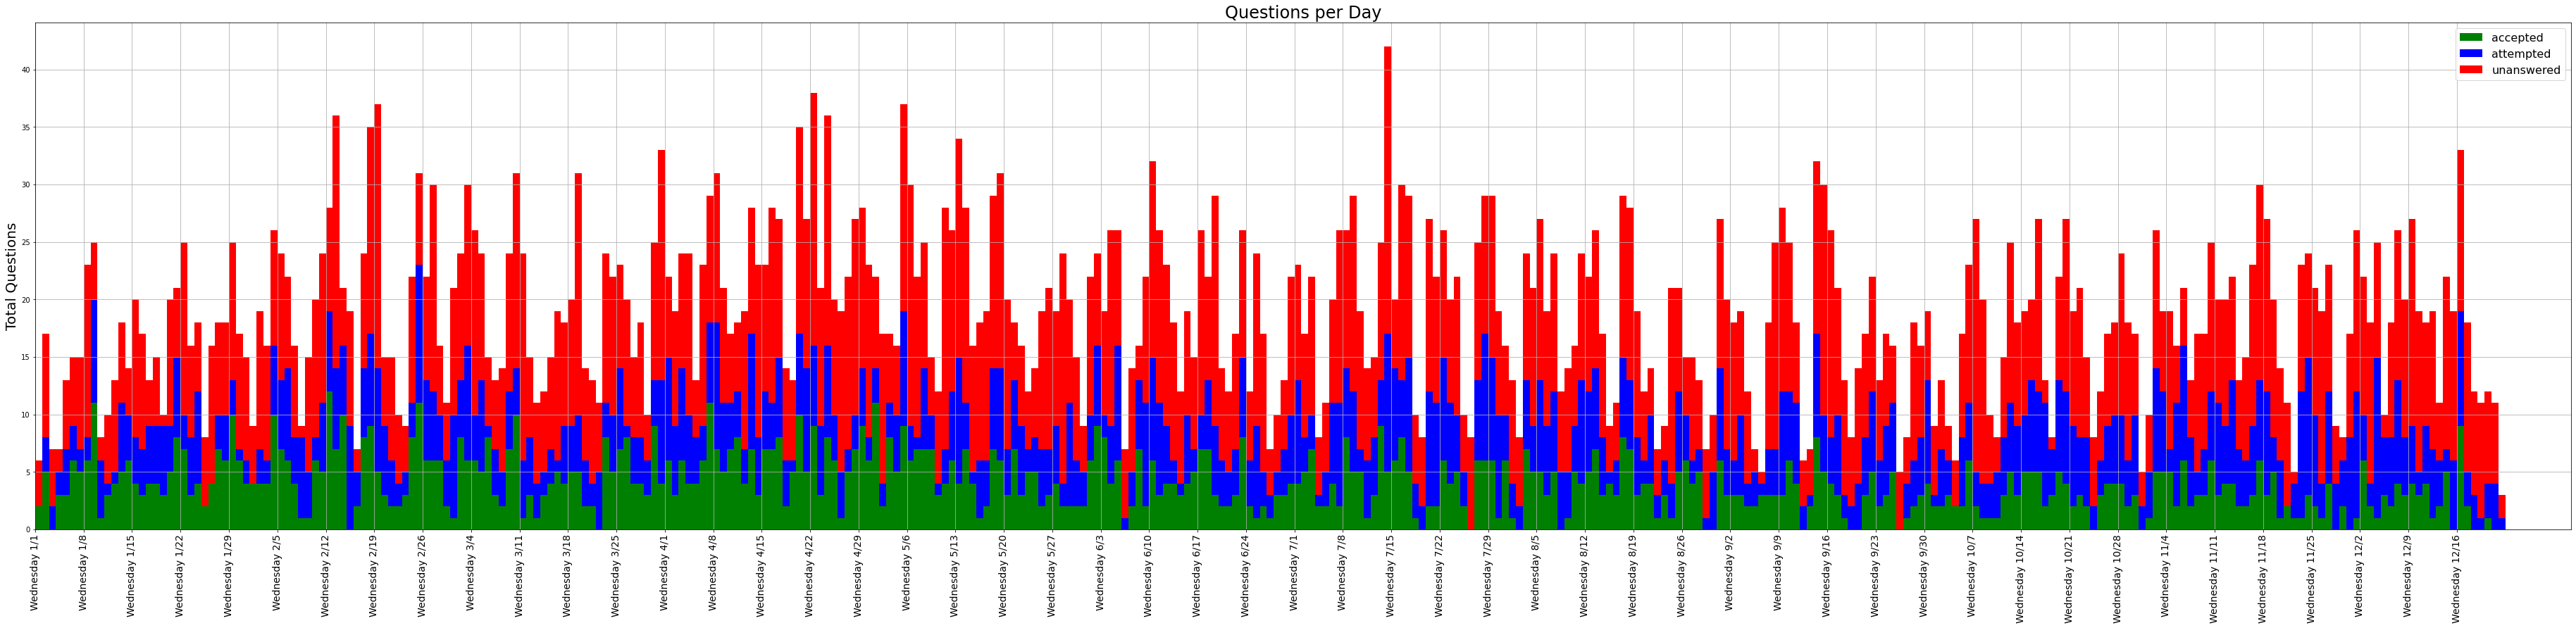

In [50]:
width = 2
answered = [a["answered"] for a in daily_list]
unanswered = [a["unanswered"] for a in daily_list]
attempted = [a["attempted"] for a in daily_list]
ind = (np.arange(len(daily_list))*width)+(width/2)
# This is for the second step in the bar chart as python won't do math on lists. 
step = np.array(answered)+np.array(attempted)

fig = plt.figure(figsize=(50,10))
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('white')
rects1 = ax.bar(ind, answered, width, color='green')
rects2 = ax.bar(ind, attempted, width, bottom=answered, color='blue')
rects3 = ax.bar(ind, unanswered, width ,bottom=step, color='red')
ax.set_ylabel('Total Questions')
ax.set_xlim(0,np.max(ind)+20)
#autolabel(ax,rects3,solved)
ax.grid()
ax.set_title("Questions per Day", fontsize=24)
ax.set_ylabel('Total Questions',fontsize=20)
ax.set_xticks(np.arange(0,np.max(ind),7*width))
ax.set_xticklabels(names,rotation=90,fontsize=14)
ax.legend(labels=['accepted', 'attempted', 'unanswered'],fontsize=16)
fig.savefig('QuestionsPerDay.png',bbox_inches='tight')


In [51]:

dt = datetime.datetime.now()
print("{0} {1}/{2}".format(calendar.day_name[dt.weekday()],dt.month,dt.day))

Tuesday 1/19


In [52]:
tags = [] 
for tag in db.query('SELECT tag, q_id FROM tags'):
    tags.append(tag)
print("Total tag rows {0}".format(len(tags)))
all_tags = set([t["tag"].lower() for t in tags])
print("Unique tags: {0}".format(len(all_tags)))

result = Counter([t["tag"] for t in tags])
result.most_common(100)

common_tag = 0
for k,v in result.items():
    if v > 3:
        common_tag += 1
print("Tags used more than once {0}".format(common_tag))


Total tag rows 28419
Unique tags: 4784
Tags used more than once 1027


In [53]:
# Example of pulling questions with a tag
temp = []
for tag in db.query('SELECT q_id FROM tags WHERE tag = "melodic"'):
    temp.append(tag["q_id"])
print(temp)

[368204, 368217, 366412, 368212, 368123, 368096, 368185, 368172, 368139, 368150, 368116, 368129, 368125, 368124, 350474, 368011, 368112, 368108, 368105, 367785, 367812, 367995, 365655, 363743, 368028, 368023, 368016, 368012, 367848, 368004, 367982, 367904, 352107, 367963, 367930, 367937, 367871, 367922, 367914, 367790, 367880, 367878, 367864, 367844, 367868, 367837, 367825, 367834, 367650, 367685, 366538, 318547, 367540, 367791, 340764, 367748, 367668, 367687, 367735, 367214, 367756, 367749, 367741, 367710, 367728, 367711, 367691, 367700, 367690, 367688, 367190, 367677, 367656, 367564, 367644, 367627, 367592, 367631, 367628, 367618, 367606, 367602, 367346, 367582, 367581, 367579, 361530, 367563, 367551, 367536, 367528, 367516, 367511, 367523, 367223, 367504, 366404, 367502, 367481, 367482, 367078, 367041, 367019, 367414, 367277, 367431, 367427, 367419, 367405, 367030, 367400, 367380, 367364, 367352, 363218, 367296, 367285, 367318, 367286, 367122, 367249, 366927, 367191, 367259, 367224,

In [54]:
# Example of getting answers for a given question.
temp = [367579, 361530, 367563, 367551, 367536, 367528, 367516, 367511, 367523, 367223, 367504, 366404, 367502, 367481, 367482, 367078, 367041, 367019, 367414, 367277, 367431, 367427, 367419, 367405, 367030, 367400, 367380, 367364, 367352, 363218, 367296, 367285, 367318, 367286, 367122, 367249, 366927, 367191, 367259, 367224, 367226, 367080, 334974, 367209, 367126, 365909, 367181, 367180, 367171, 335870, 367143, 367057, 367112, 367106, 366975, 367095, 367093, 367084, 367074, 367077, 367070, 367072, 367026, 367033, 367056, 367049, 353570, 361948, 367034, 367017, 367021, 366943, 366973, 366960, 366993, 366996, 366981, 366967, 366954, 366953, 366942, 366811, 366357, 366877, 366855, 366905, 366895, 289938, 366785, 365550, 366880, 366879, 366873, 366868, 366798, 366839, 366849, 366831, 366732, 366767, 366766, 366765, 366760, 366606, 366523, 366715, 366719, 366713, 365866, 366692, 366702, 366700, 366550, 366653, 366117, 366646, 366642, 366455, 363462, 366361, 366574, 366097, 366587, 360162, 366588, 366577, 366555, 366564, 366410, 366456, 366530, 366543]
for t in temp:
    o = db.query('SELECT id, q_id, user_id, accepted FROM answers WHERE q_id == {0}'.format(t))
    print(o)

[]
[{'id': 367576, 'q_id': 361530, 'user_id': 22870, 'accepted': None}]
[{'id': 367575, 'q_id': 367563, 'user_id': 64579, 'accepted': True}]
[{'id': 367566, 'q_id': 367551, 'user_id': 25940, 'accepted': True}]
[]
[{'id': 367535, 'q_id': 367528, 'user_id': 64471, 'accepted': None}]
[]
[{'id': 367520, 'q_id': 367511, 'user_id': 38812, 'accepted': None}]
[]
[{'id': 367455, 'q_id': 367223, 'user_id': 35086, 'accepted': True}]
[]
[{'id': 367309, 'q_id': 366404, 'user_id': 3384, 'accepted': True}]
[]
[]
[]
[{'id': 367474, 'q_id': 367078, 'user_id': 20914, 'accepted': None}]
[{'id': 367471, 'q_id': 367041, 'user_id': 20914, 'accepted': None}]
[{'id': 367468, 'q_id': 367019, 'user_id': 20914, 'accepted': None}]
[{'id': 367444, 'q_id': 367414, 'user_id': 33908, 'accepted': None}]
[]
[{'id': 367432, 'q_id': 367431, 'user_id': 37023, 'accepted': True}]
[]
[]
[]
[{'id': 367398, 'q_id': 367030, 'user_id': 52334, 'accepted': None}]
[]
[]
[]
[{'id': 367357, 'q_id': 367352, 'user_id': 63962, 'accepted

In [67]:
# Left outer join of tags and questions to get each tag by question answer status.
out = db.query('SELECT tag,accepted_answer_id,id FROM tags LEFT OUTER JOIN questions ON questions.id = tags.q_id;')
print(len(out))
answered_tags = []
tried_tags = [] # No accepted answers
unanswered_tags = [] # No answers period
for o in out:
    clean_tag = o["tag"].lower()
    if clean_tag[1] == ".":
        clean_tag = clean_tag[2:]

    clean_tag = clean_tag.replace('-', '')
    attempts = db.query('SELECT id, q_id, user_id, accepted FROM answers WHERE q_id == {0}'.format(o["id"]))

    if o["accepted_answer_id"] is not None:
        answered_tags.append(clean_tag) # if it has an accepted answer that's great
    elif len(attempts) > 0 and o["accepted_answer_id"] is None:
        #for i in range(0,len(attempts)):
        tried_tags.append(clean_tag)
    else: 
        unanswered_tags.append(clean_tag)
        

at_count = Counter(answered_tags)
tt_count = Counter(tried_tags)
ut_count = Counter(unanswered_tags)

28419


In [68]:
def move_bad_tag(at_count,ut_count,tt_count,from_tag,to_tag):
    # do a single move
    if to_tag in at_count.keys() and from_tag in at_count.keys():
        at_count[to_tag] += at_count[from_tag]
        at_count.pop(from_tag)
    if to_tag in ut_count.keys() and from_tag in ut_count.keys():
        ut_count[to_tag] += ut_count[from_tag]
        ut_count.pop(from_tag)    
    if to_tag in tt_count.keys() and from_tag in tt_count.keys():
        tt_count[to_tag] += tt_count[from_tag]
        tt_count.pop(from_tag)    

        
def manual_dedupe_and_clean(at_count,ut_count,tt_count):
    # manually deduplicate tags
    move_bad_tag(at_count,ut_count,tt_count,"cmake_install","cmake")
    move_bad_tag(at_count,ut_count,tt_count,"cmakelist","cmake")
    move_bad_tag(at_count,ut_count,tt_count,"cmakelist.txt","cmake")
      bdTagsByDistro.png
    move_bad_tag(at_count,ut_count,tt_count,"rosmelodic","melodic") 
    move_bad_tag(at_count,ut_count,tt_count,"tf2_ros","tf2") 
    keys = list(at_count.keys())
    
    to_de_plural = []
    for k in keys:
        temp = k + "s";
        if temp in keys:
            to_de_plural.append((k,temp))
        
        temp = k + ".launch"
        if temp in keys:
            to_de_plural.append((k,temp))
            
    for tdp in to_de_plural:
        move_bad_tag(at_count,ut_count,tt_count,tdp[1],tdp[0])
        
    return 


print("Before cleaning {0},{1},{2}".format(len(at_count),len(tt_count),len(ut_count)))
manual_dedupe_and_clean(at_count,ut_count,tt_count)
print("After cleaning {0},{1},{2}".format(len(at_count),len(tt_count),len(ut_count)))
#ut_count = sorted(ut_count)
#at_count = sorted(at_count)

Before cleaning 1850,2075,3183
After cleaning 1790,2047,3143


In [74]:
tag_results = []

for k in ut_count.most_common(200):
    tag = k[0]
    result = {}
    result["tag"]= tag
    result["answered"] = at_count[tag]
    result["unanswered"] = ut_count[tag]
    result["attempted"] = tt_count[tag] 
    result["total"] = ut_count[tag]+at_count[tag]+tt_count[tag]
    result["prct_solved"] = 100*(at_count[tag]/result['total'])
    result["prctadmendment_attempted"] = 100*((tt_count[tag]+at_count[tag])/result['total'])
    tag_results.append(result)


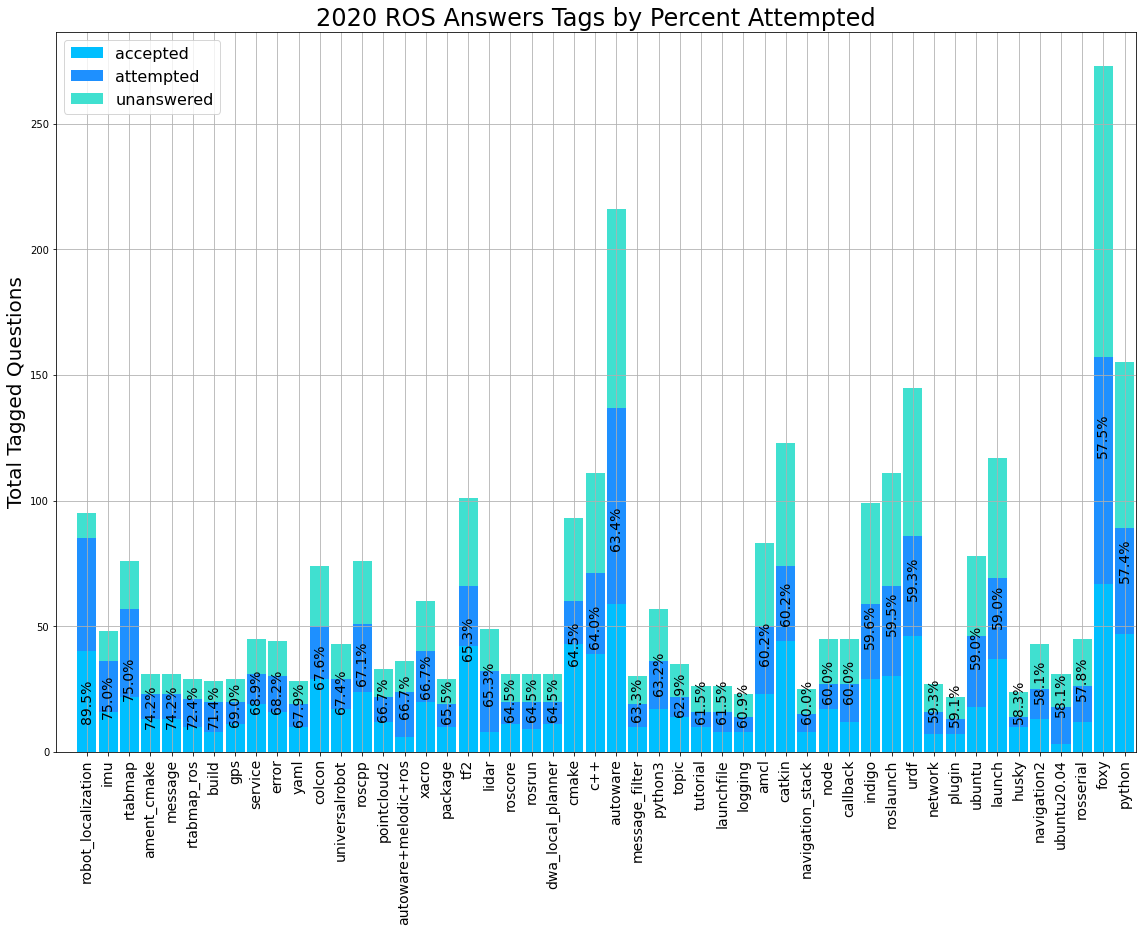

In [112]:
def autolabel(ax,rects,tags):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect,tag in zip(rects,tags):
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(tag),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    rotation=90, fontsize=14,
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def df_to_tag_plot(t_df,labeler,title,N=50,width=0.9):
    if N > len(t_df):
        N = len(t_df)
    answered = t_df[0:N]["answered"].tolist()
    unanswered = t_df[0:N]["unanswered"].tolist()
    attempted = t_df[0:N]["attempted"].tolist()
    tags = t_df[0:N]["tag"].tolist()
    solved = t_df[0:N]["prct_attempted"].tolist()
    ind = (np.arange(N)*np.ceil(width))+width/2
    # This is for the second step in the bar chart as python won't do math on lists. 
    step = np.array(answered)+np.array(attempted)

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_axes([0,0,1,1])
    fig.patch.set_facecolor('white')
    rects1 = ax.bar(ind, answered, width, color='deepskyblue')
    rects2 = ax.bar(ind, attempted, width, bottom=answered, color='dodgerblue')
    rects3 = ax.bar(ind, unanswered, width ,bottom=step, color='turquoise')
    ax.set_ylabel('Total Tagged Questions')
    labeler(ax,rects3,solved)
    ax.grid()
    #ax.text(15, 130, 'Bar labels are percentage of tag that have been answered.', fontsize=20,  color='blue')
    #ax.semilogy()
    ax.set_title(title, fontsize=24)
    ax.set_ylabel('Total Tagged Questions',fontsize=20)
    ax.set_xticks(ind)
    ax.set_xticklabels(tags,rotation=90,fontsize=14)
    plt.xlim([-1,50])
    ax.legend(labels=['accepted', 'attempted', 'unanswered'],fontsize=16)
    return fig

    
    
temp = sorted(tag_results, key=lambda k: k['prct_attempted'])
temp.reverse()
df_prct = pd.DataFrame(temp)
df_to_tag_plot(df_prct,autolabel,"2020 ROS Answers Tags by Percent Attempted")
fig.savefig("2020AnsweredTags.png",bbox_inches='tight')


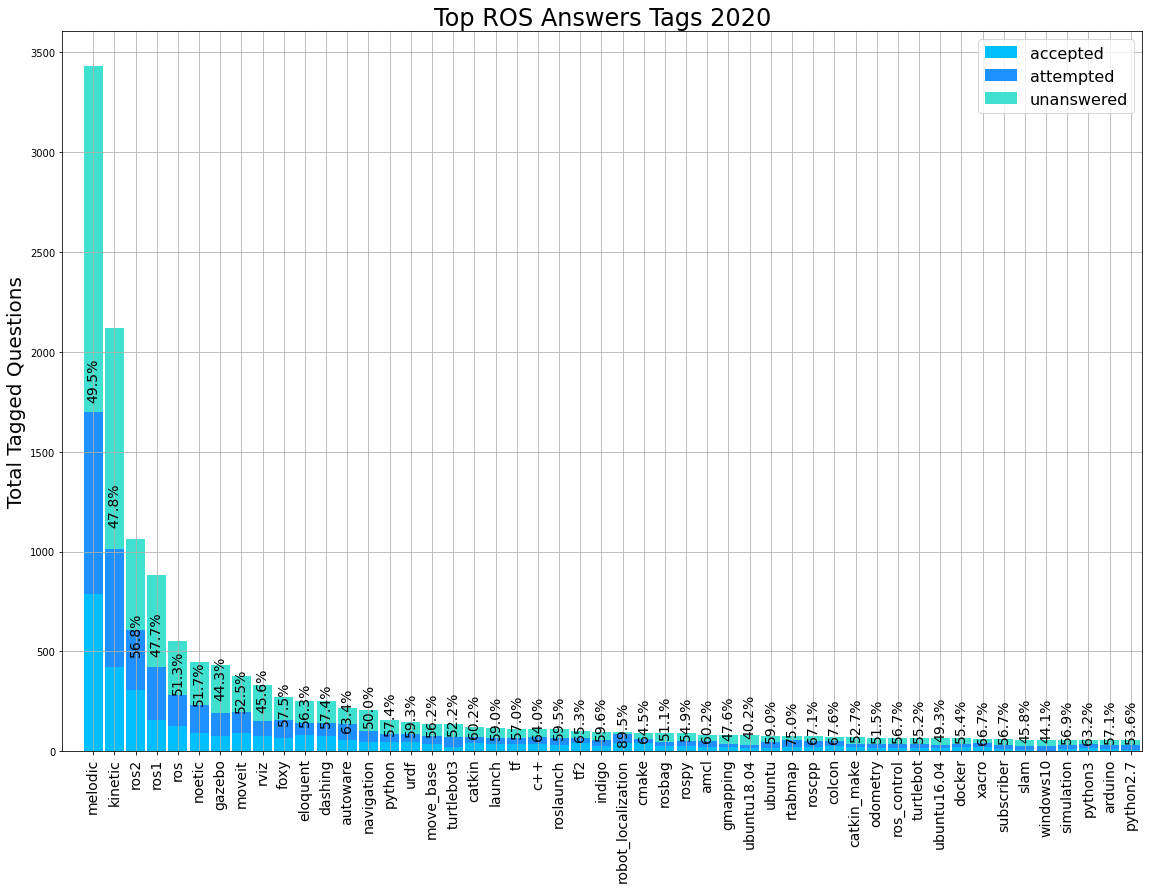

In [117]:
temp = sorted(tag_results, key=lambda k: k['total'])
temp.reverse()
df = pd.DataFrame(temp)
fig = df_to_tag_plot(df,autolabel,"Top ROS Answers Tags 2020")
fig.savefig("2020TopTags.png",bbox_inches='tight')

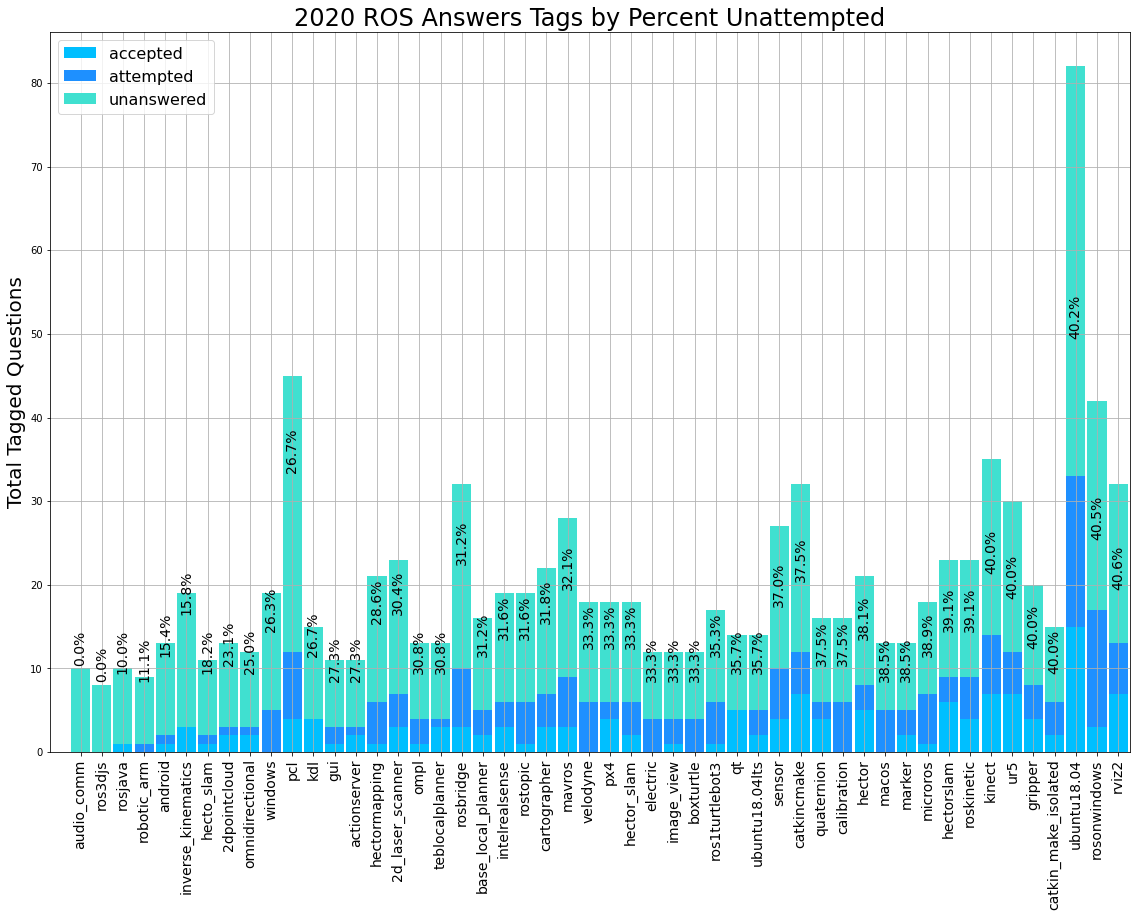

In [118]:
temp = sorted(tag_results, key=lambda k: k['prct_attempted'])
df_prct = pd.DataFrame(temp)
fig = df_to_tag_plot(df_prct,autolabel,"2020 ROS Answers Tags by Percent Unattempted")
fig.savefig("2020UnansweredTags.png",bbox_inches='tight')

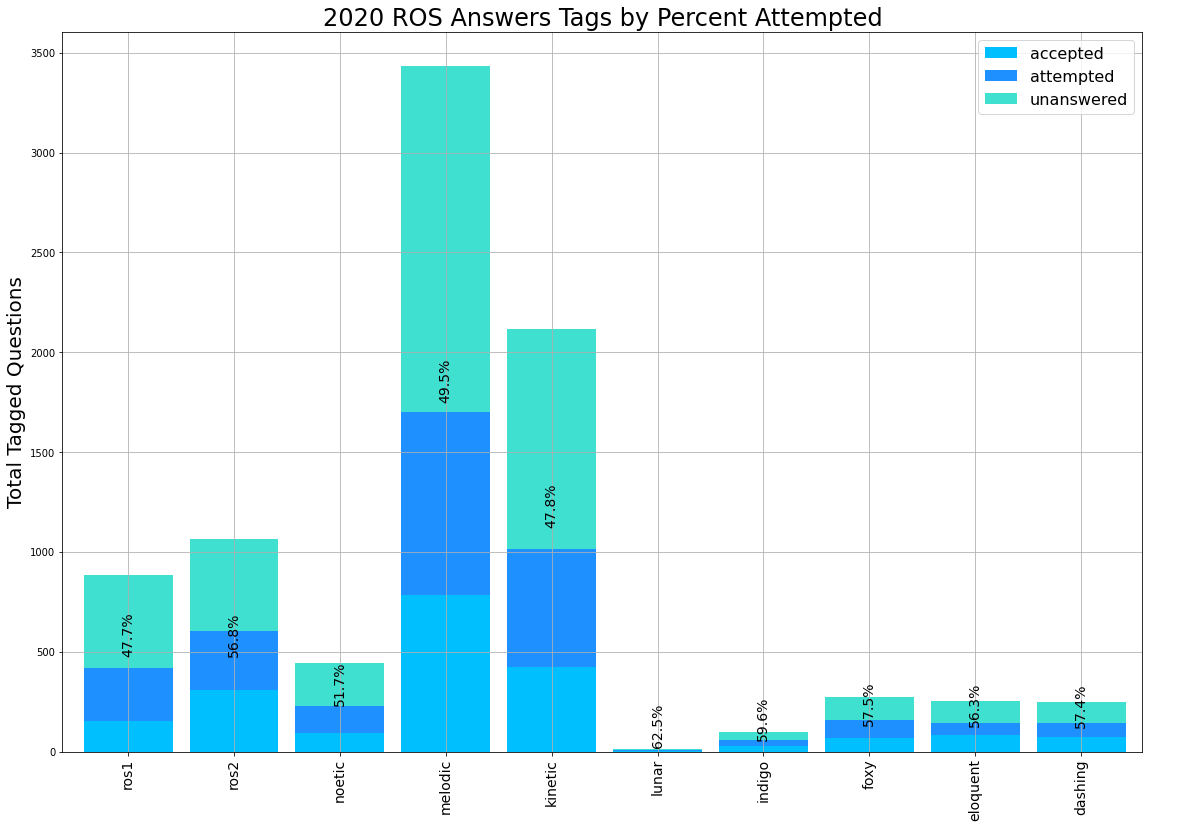

In [116]:
def tag_list_to_stats(tag_list,at_count,ut_count,tt_count):
    data = []
    for tag in tag_list:
        result = {}
        result["tag"]= tag
        result["answered"] = at_count[tag]
        result["unanswered"] = ut_count[tag]
        result["attempted"] = tt_count[tag]
        result["total"] = ut_count[tag]+at_count[tag]+tt_count[tag]
        result["prct_solved"] = 100*(at_count[tag]/result['total'])
        result["prct_attempted"] = 100*((tt_count[tag]+at_count[tag])/result['total'])
        data.append(result)
    return data


ros_1_names = ['noetic','melodic','kinetic','lunar','indigo']
ros_2_names = ["foxy","eloquent",'dashing','crystal']
versions = ["ros1","ros2"]

full_list = versions + ros_1_names + ros_2_names

ros_values = tag_list_to_stats(full_list,at_count,ut_count,tt_count)
df_distro = pd.DataFrame(ros_values)
df_distro.head()
fig = df_to_tag_plot(df_distro,autolabel,"2020 ROS Answers Tags by Percent Attempted",width=4.2)
fig.savefig("2020AnsweredTagsByDistro.png",bbox_inches='tight')



In [274]:
# Let's really quickly get the number of views for a particular tag. 

tag_views = {}
tagged_questions = db.query('SELECT tag, q_id FROM tags')
for tq in tagged_questions:
    raw_questions = db.query('SELECT view_count FROM questions WHERE id == {0}'.format(tq["q_id"]))
    for rq in raw_questions:
        if tq["tag"] not in tag_views.keys():
            tag_views[tq["tag"]] = {"views":0,"questions":0,"qids":[]}
        tag_views[tq["tag"]]["views"] += rq["view_count"]
        tag_views[tq["tag"]]["questions"] += 1
        tag_views[tq["tag"]]["qids"].append(tq["q_id"])


# Views per Question
        
tag_vpq = []
for temp in tag_views.items():
    if temp[1]["questions"] > 3:
        tag_vpq.append((temp[0],temp[1]["views"] / temp[1]["questions"]))
    
                
tag_vpq = sorted(tag_vpq, key=lambda k: k[1])
tag_vpq.reverse()


# Total Views per Tag
tag_totals = []
for temp in tag_views.items():
    tag_totals.append((temp[0],temp[1]["views"]))
    
                
tag_totals = sorted(tag_totals, key=lambda k: k[1])
tag_totals.reverse()


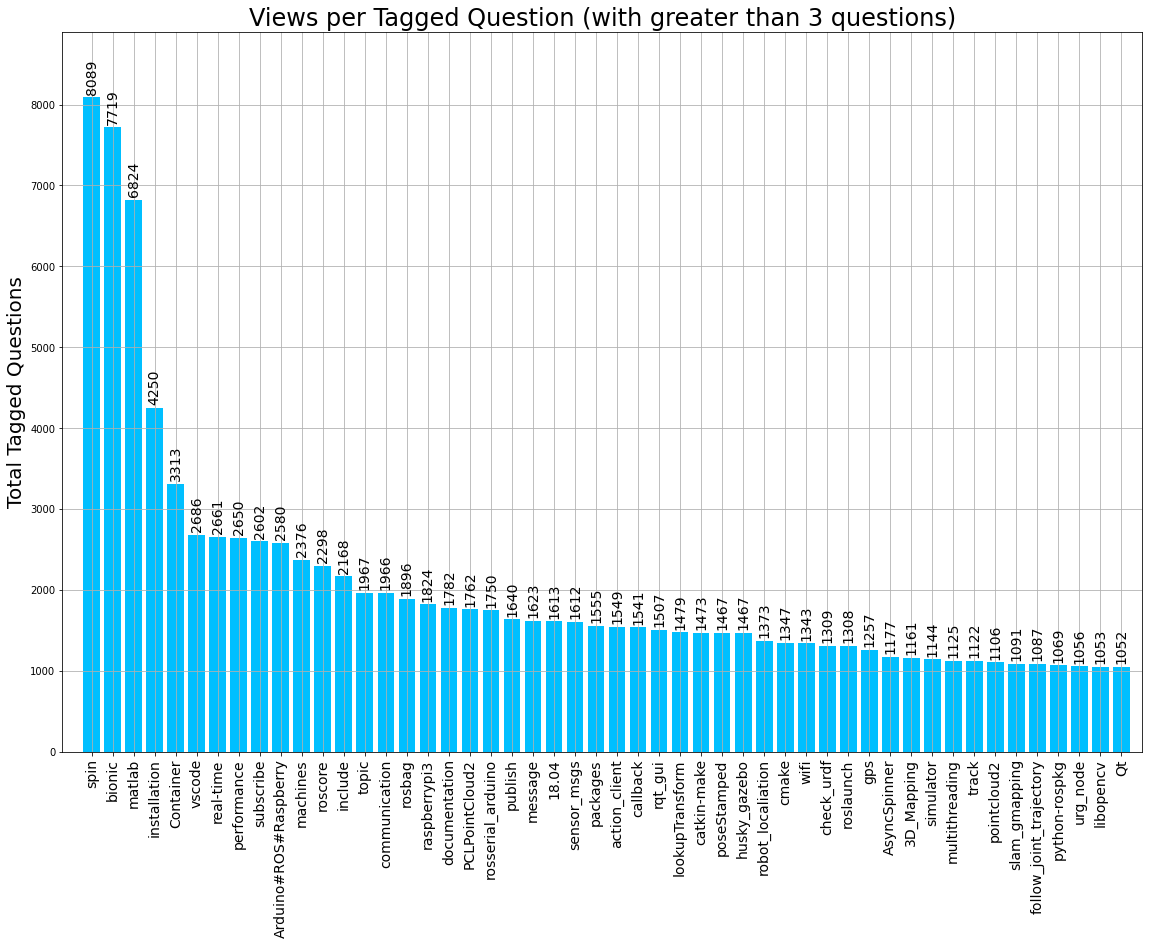

In [283]:
def labeler(ax,rects,tags):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect,tag in zip(rects,tags):
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(tag),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    rotation=90, fontsize=14,
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

N = 50
tags = [r[0] for r in tag_vpq[0:N]]
vpq = [r[1] for r in tag_vpq[0:N]]
width = 0.8
ind = (np.arange(N)*np.ceil(width))+width/2
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('white')
rects1 = ax.bar(ind, vpq, width, color='deepskyblue')
ax.set_ylabel('Average Views per Question')
labeler(ax,rects1,vpq)
ax.grid()
#ax.semilogy()
ax.set_title("Views per Tagged Question (with greater than 3 questions)", fontsize=24)
ax.set_ylabel('Total Tagged Questions',fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(tags,rotation=90,fontsize=14)
plt.xlim([-1,np.max(ind)+1])
plt.ylim([0,np.max(vpq)*1.1])
plt.show
fig.savefig("ViewsPerQuestionByTag.png",bbox_inches='tight')
    

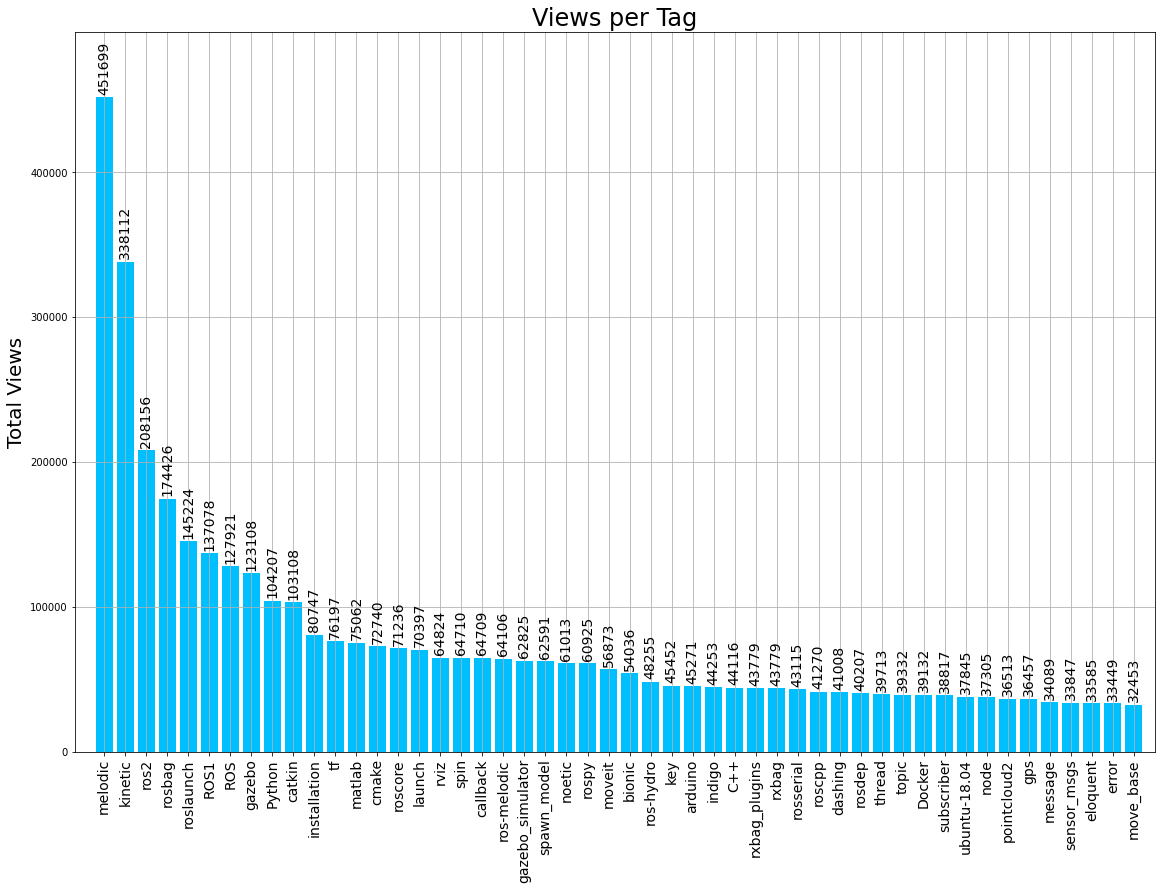

In [284]:
N = 50
tags = [r[0] for r in tag_totals[0:N]]
totals = [r[1] for r in tag_totals[0:N]]
width = 0.8
ind = (np.arange(N)*np.ceil(width))+width/2
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('white')
rects1 = ax.bar(ind, totals, width, color='deepskyblue')
ax.set_ylabel('Average Views per Question')
labeler(ax,rects1,totals)
ax.grid()
#ax.semilogy()
ax.set_title("Views per Tag", fontsize=24)
ax.set_ylabel('Total Views',fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(tags,rotation=90,fontsize=14)
plt.xlim([-1,np.max(ind)+1])
plt.ylim([0,np.max(totals)*1.1])
plt.show
fig.savefig("TotalViewsPerTag.png",bbox_inches='tight')

In [56]:
# Next up let's look at this year's users. Why don't we get histograms of the number of
# questions asked, answered, unanswered, and attempted by each user_id

# Get all the users
users = db.query('SELECT id from users')

user_stats = []
for user in users: # for each user
    # Empty dictionary
    temp = {}
    temp["user_id"] = user["id"]
    temp["answered"] = 0
    temp["attempted"] = 0
    temp["unanswered"] = 0
    temp["unaccepted"] = 0
    temp["total_answered"] = 0
    temp["answers_accepted"] = 0

    # how many questions have they asked?
    asked = db.query('SELECT id, accepted_answer_id FROM questions WHERE user_id == {0}'.format(user["id"]))
    temp["total"] = len(asked)
    
    for ask in asked: # for each question they asked
        # how many attempted answers were there?
        attempts = db.query('SELECT id FROM answers WHERE q_id == {0}'.format(ask["id"]))
        # If there is no accepted answer
        if ask["accepted_answer_id"] == None:
            if len(attempts) > 0: # Count the number of attempted answers
                #for attempt in attempts:
                temp["attempted"] += 1
                temp["unaccepted"] += 1 # And call it unaccepted
            else:
                temp["unanswered"] += 1 # Add another unanswered question 
        else:
            temp["answered"] += 1 # An answer was accepted 
        
    # how many answers have they made?
    answers = db.query('SELECT id, user_id, accepted FROM answers WHERE user_id == {0}'.format(user["id"]))
    for answer in answers:
        temp["total_answered"]+= 1
        if answer["accepted"]:
            temp["answers_accepted"] += 1        
    user_stats.append(temp)

user_df = pd.DataFrame(data=user_stats)
user_df.head()

,user_id,answered,attempted,unanswered,unaccepted,total_answered,answers_accepted,total
0,2,0,0,0,0,1,1,0
1,3,0,0,0,0,89,42,0
2,8,0,0,0,0,1,1,0
3,9,0,0,0,0,2,0,0
4,10,0,0,0,0,13,8,0


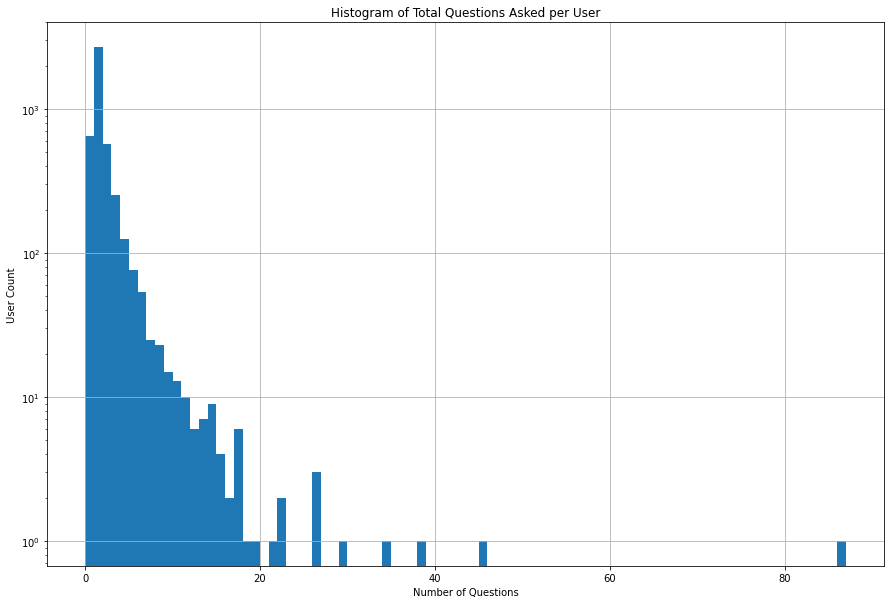

<Figure size 432x216 with 0 Axes>

In [57]:
#n_bins = 50
#fig, axs = plt.plot(0,0,tight_layout=True,figsize=(15,10))
fig= plt.figure(figsize=(15,10))
t = user_df["total"].tolist()
plt.hist(t, bins=np.max(t))
plt.semilogy()
plt.grid()
plt.title('Histogram of Total Questions Asked per User')
plt.xlabel("Number of Questions")
plt.ylabel("User Count")

fig= plt.figure(figsize=(6,3))

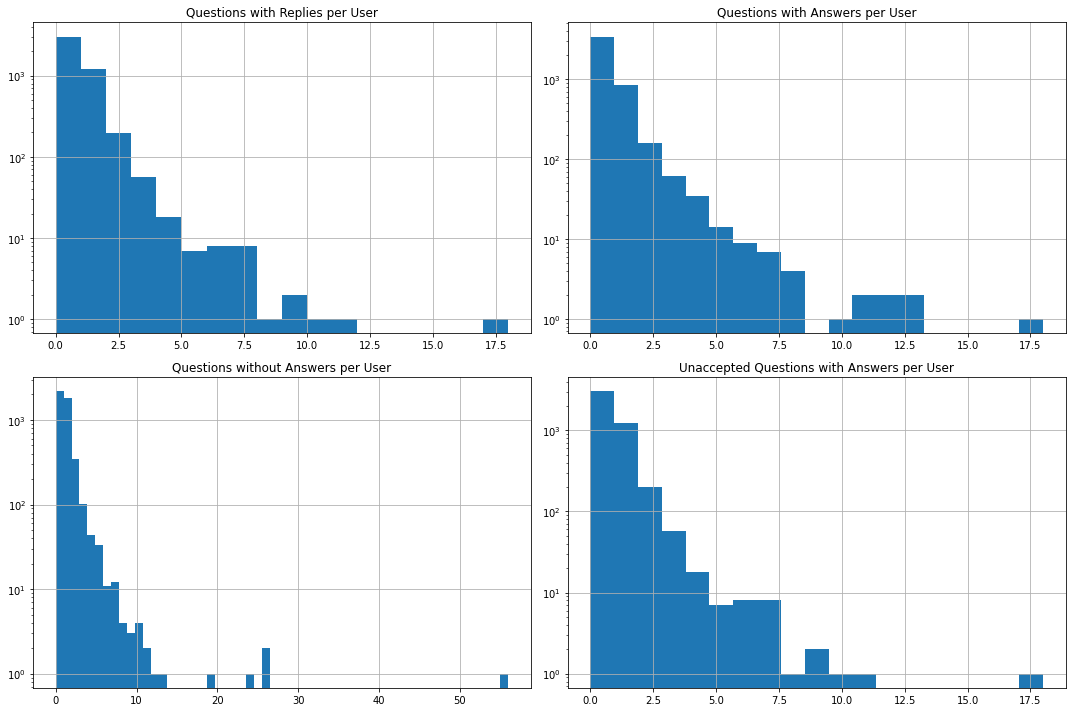

In [58]:
n_bins = 50
fig, axs = plt.subplots(2, 2, tight_layout=True,figsize=(15,10))

t = user_df["attempted"].tolist()
axs[0][0].hist(t, bins=np.max(t))
axs[0][0].semilogy()
axs[0][0].grid()
axs[0][0].title.set_text('Questions with Replies per User')

t = user_df["answered"].tolist()
axs[0][1].hist(t, bins=np.max(t)+1)
axs[0][1].semilogy()
axs[0][1].grid()
axs[0][1].title.set_text('Questions with Answers per User')


t = user_df["unanswered"].tolist()
axs[1][0].hist(t, bins=np.max(t)+1)
axs[1][0].semilogy()
axs[1][0].grid()
axs[1][0].title.set_text('Questions without Answers per User')


t = user_df["unaccepted"].tolist()
axs[1][1].hist(t, bins=np.max(t)+1)
axs[1][1].semilogy()
axs[1][1].grid()
axs[1][1].title.set_text('Unaccepted Questions with Answers per User')


In [59]:
#user_df["unanswered"].argmax()
print("Most unanswered")
print(user_df.loc[user_df["unanswered"].argmax()])
print("Most answered")
print(user_df.loc[user_df["answered"].argmax()])
print("Most unaccepted")
print(user_df.loc[user_df["unaccepted"].argmax()])
print("Most attempted")
print(user_df.loc[user_df["attempted"].argmax()])
print("Total")
print(user_df.loc[user_df["total"].argmax()])


print("Most Answers Given")
print(user_df.loc[user_df["total_answered"].argmax()])
print("Most Answers Accepted")
print(user_df.loc[user_df["answers_accepted"].argmax()])



Most unanswered
user_id             26847
answered               13
attempted              18
unanswered             56
unaccepted             18
total_answered          6
answers_accepted        3
total                  87
Name: 612, dtype: int64
Most answered
user_id             34739
answered               18
attempted               2
unanswered              6
unaccepted              2
total_answered         28
answers_accepted        7
total                  26
Name: 1001, dtype: int64
Most unaccepted
user_id             26847
answered               13
attempted              18
unanswered             56
unaccepted             18
total_answered          6
answers_accepted        3
total                  87
Name: 612, dtype: int64
Most attempted
user_id             26847
answered               13
attempted              18
unanswered             56
unaccepted             18
total_answered          6
answers_accepted        3
total                  87
Name: 612, dtype: int64
Total
user

1216


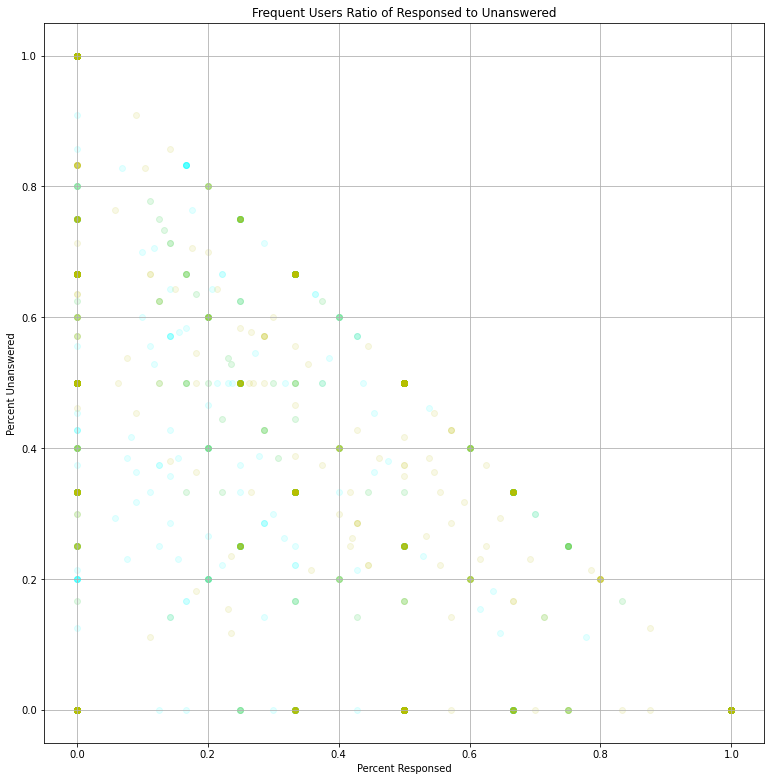

In [45]:
t_df = user_df[user_df["total"]>1]

totals = np.array(t_df["total"].tolist())

responded = np.array(t_df["attempted"].tolist()) / totals
answered = np.array(t_df["answered"].tolist()) / totals
unresponded = np.array(t_df["unanswered"].tolist()) / totals
answers_given = np.array(t_df["total_answered"].tolist())


print(len(totals))

fig=plt.figure(figsize=(10,10))
ax=fig.add_axes([0,0,1,1])
ax.scatter(responded, unresponded, color='cyan', alpha=0.1)
ax.scatter(answered, unresponded, color='y', alpha=0.1)

ax.grid()
ax.set_xlabel('Percent Responsed')
ax.set_ylabel('Percent Unanswered')
ax.set_title('Frequent Users Ratio of Responsed to Unanswered')
plt.show()

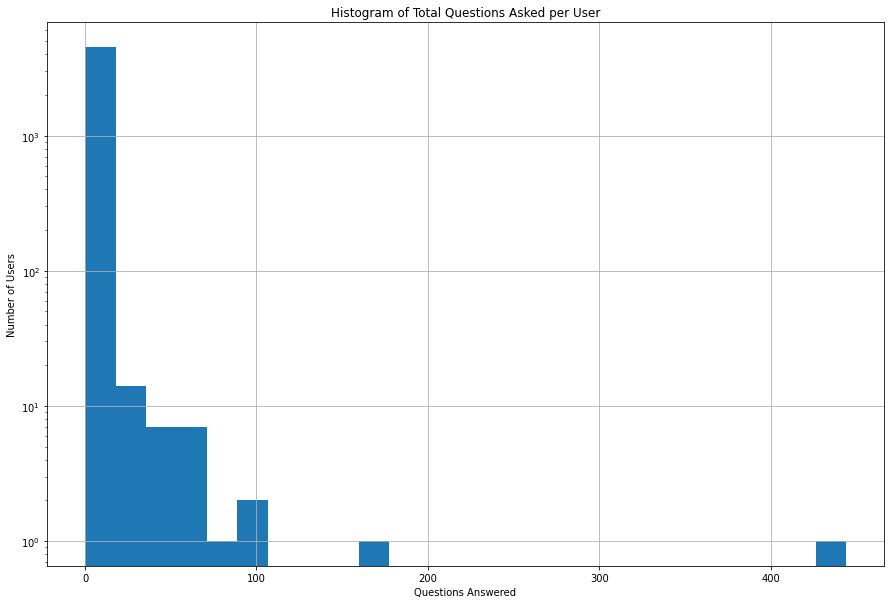

<Figure size 432x216 with 0 Axes>

In [46]:
#n_bins = 50
#fig, axs = plt.plot(0,0,tight_layout=True,figsize=(15,10))
fig= plt.figure(figsize=(15,10))
t = user_df["total_answered"].tolist()
plt.hist(t, bins=25)
plt.semilogy()
plt.grid()
plt.title('Histogram of Total Questions Asked per User')
plt.xlabel("Questions Answered")
plt.ylabel("Number of Users")

fig= plt.figure(figsize=(6,3))


In [60]:
# Load top 1000 words from a pkl
top_thousand = pkl.load( open( "/home/kscottz/Code/ros_metrics/ThousandWords.pkl", "rb" ) )


# Get answered and unanswered titles
answered = []
unanswered = [] 

for answer in db.query('SELECT summary, title, accepted_answer_id FROM questions'):
    if answer["accepted_answer_id"] is not None:
        answered.append(sanitize(answer["summary"]))
    else:
        unanswered.append(sanitize(answer["summary"]))                          
                        
def get_word_count(data): 
    """
    Count all the words in a list of strings.
    """                         
    c = Counter()
    for d in data:
        d = d.lower()
        d = d.translate(str.maketrans('', '', string.punctuation))
        d = d.translate(str.maketrans('', '', "\n\t"))
        c += Counter(d.split(" "))
    return c 
  
def remove_top_1k_words(counter,word_list):
    for word in word_list:
        if word.lower() in counter:
            counter.pop(word.lower())
    return counter 
    
answered_count = get_word_count(answered)                          
unanswered_count = get_word_count(unanswered)     
print(len(answered_count),len(unanswered_count))
answered_count = remove_top_1k_words(answered_count,top_thousand)
unanswered_count = remove_top_1k_words(unanswered_count,top_thousand)
print(len(answered_count),len(unanswered_count))


15085 37345
14366 36535


In [62]:
print(answered_count.most_common(200))
print("--------------------")
print(unanswered_count.most_common(200))
print("====================")
print(answered_count["hii"])
print(unanswered_count["hii"])
print("====================")
print(answered_count["hi"])
print(unanswered_count["hi"])

[('', 5948), ('ros', 1075), ('using', 976), ('robot', 790), ('file', 712), ('im', 663), ('package', 606), ('node', 515), ('trying', 501), ('error', 493), ('following', 484), ('launch', 375), ('code', 364), ('ubuntu', 358), ('data', 358), ('topic', 337), ('running', 330), ('ros2', 300), ('rviz', 289), ('tried', 289), ('message', 288), ('however', 280), ('its', 270), ('hi', 261), ('dont', 259), ('install', 247), ('inf', 240), ('gazebo', 239), ('seems', 237), ('working', 226), ('into', 226), ('files', 223), ('python', 216), ('packages', 213), ('command', 207), ('hello', 200), ('used', 194), ('installed', 192), ('melodic', 191), ('something', 190), ('tutorial', 189), ('nodes', 186), ('works', 185), ('frame', 183), ('2', 179), ('issue', 176), ('different', 174), ('ive', 171), ('source', 170), ('publish', 162), ('thanks', 155), ('anyone', 155), ('version', 155), ('because', 154), ('without', 153), ('tf', 149), ('cant', 146), ('moveit', 144), ('getting', 140), ('imu', 140), ('messages', 140),

In [85]:
# Let's look at the ratio of answered to unanswered. 
def combined_stats(first, second,N):
    result = []
    top_n = first.most_common(N)
    for a in top_n:
        k = a[0]
        if k == '': # clean up hack
            continue
        if k == 'inf': # clean up hack
            continue
            
        temp = {}
        temp["name"] = k
        temp["answered"] = a[1]    
        temp["unanswered"] = 0
        temp["ratio"] = 1 
        temp["total"] = a[1]
        if second.get(k) is not None:
            temp["unanswered"] = second.get(k)
            temp["ratio"] = 100.00 * (float(a[1]) / second.get(k))
            temp["total"] = a[1] + second.get(k)
        result.append(temp)
    return result


ValueError: shape mismatch: objects cannot be broadcast to a single shape

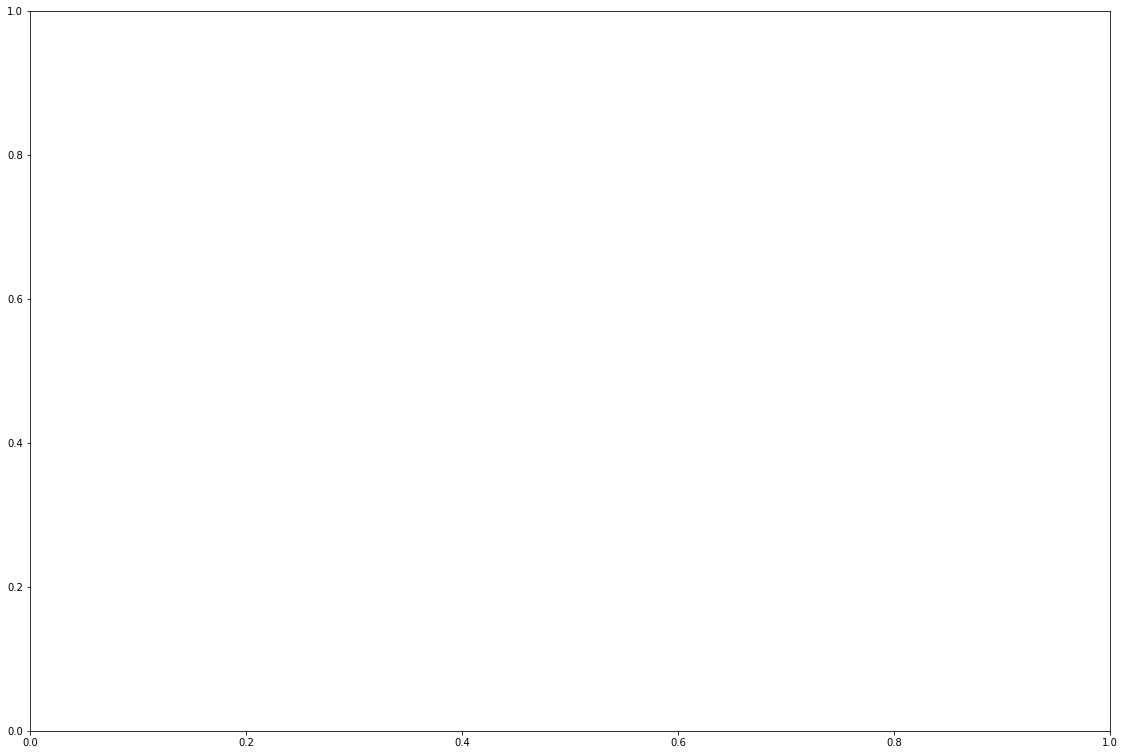

In [93]:
def autolabel(ax,rects,tags):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect,tag in zip(rects,tags):
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(tag),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    rotation=90, fontsize=14,
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def df_to_word_plot(t_df,labeler,N,title):
    answered = t_df[0:N]["answered"].tolist()
    unanswered = t_df[0:N]["unanswered"].tolist()
    tags = t_df[0:N]["name"].tolist()
    solved = t_df[0:N]["ratio"].tolist()
    ind = np.arange(N) 
    # This is for the second step in the bar chart as python won't do math on lists. 
    step = np.array(answered)
    width = 0.9
    
    
    ax = fig.add_axes([0,0,1,1])
    fig.patch.set_facecolor('white')
    rects1 = ax.bar(ind, answered, width, color='deepskyblue')
    rects2 = ax.bar(ind, unanswered, width ,bottom=step, color='turquoise')
    ax.set_ylabel('Total Questions with Words')
    labeler(ax,rects2,solved)
    ax.grid()
    #ax.text(15, 130, 'Bar labels are percentage of tag that have been answered.', fontsize=20,  color='blue')
    #ax.semilogy()
    ax.set_title(title, fontsize=24)
    ax.set_ylabel('Total Tagged Questions',fontsize=20)
    ax.set_xticks(ind)
    ax.set_xticklabels(tags,rotation=90,fontsize=14)
    plt.xlim([-1,N])
    ax.legend(labels=['answered', 'unanswered'],fontsize=16)
    plt.show()
    fig.savefig("TotalViewsPerTag.png",bbox_inches='tight')
    return fig

# Repeat the most common words with the question body. 
fig = plt.figure(figsize=(15,10))

N = 100
terms = combined_stats(answered_count,unanswered_count,N)
terms_df = pd.DataFrame(data=terms)
fig = df_to_word_plot(terms_df,autolabel,N-1,"Most Common Answered Words in Question Body")


In [80]:
a = []
a.remove?

In [65]:
all_titles = ""
answered_titles = ""
unanswered_titles = ""
for answer in db.query('SELECT title, accepted_answer_id FROM questions'):
    all_titles += " " + answer["title"]
    if answer["accepted_answer_id"] is not None:
        answered_titles += " " + answer["title"]
    else:
        unanswered_titles += " " + answer["title"]


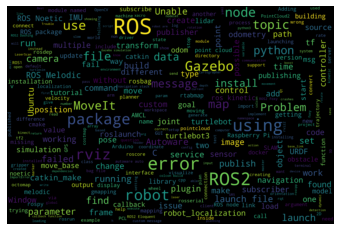

In [119]:
wc = wordcloud.WordCloud(max_font_size=200,relative_scaling='auto',width=3000, height=2000, max_words=300, background_color="black", scale=1).generate(all_titles)
img = wc.to_image()
img.save("all_titles.png")
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


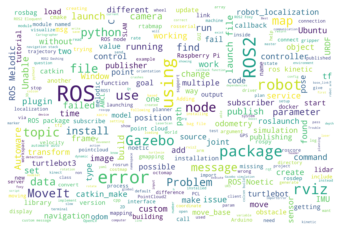

In [21]:
wc = wordcloud.WordCloud(max_font_size=200,relative_scaling='auto',width=3000, height=2000, max_words=300, background_color="white", scale=1).generate(all_titles)
img = wc.to_image()
img.save("answered.png")


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


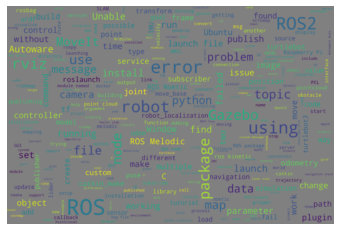

In [22]:
wc = wordcloud.WordCloud(max_font_size=200,relative_scaling='auto',width=3000, height=2000, max_words=300, background_color="gray", scale=1).generate(unanswered_titles)
img = wc.to_image()
img.save("unanswered.png")

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [3]:
import pandas as pd


NameError: name 'ls' is not defined

In [12]:
import pandas as pd
df = pd.read_csv("./ROSCON2016.csv")
for row in df.iterrows():
    print("link {0}".format(row[1]["video"])) 

https://vimeo.com/187699562
https://vimeo.com/187699565
https://vimeo.com/187696091
https://vimeo.com/187699449
https://vimeo.com/187699448
https://vimeo.com/187699563
https://vimeo.com/187699566
https://vimeo.com/187699447
https://vimeo.com/187699363
https://vimeo.com/187699368
nan
https://vimeo.com/187699083
https://vimeo.com/187698874
https://vimeo.com/187699081
https://vimeo.com/187699082
https://vimeo.com/187696096
https://vimeo.com/187705230
https://vimeo.com/187705228
https://vimeo.com/187696089
https://vimeo.com/187705078
https://vimeo.com/187705231
https://vimeo.com/187705073
https://vimeo.com/187705229
https://vimeo.com/187696090
nan
https://vimeo.com/187696092
https://vimeo.com/187705380
https://vimeo.com/187699564
https://vimeo.com/187705379
